In [1]:
from qiskit import *

In [2]:
def ghz_dynamic_circuit(num_q):
    qubits = QuantumRegister(4)
    clbits = ClassicalRegister(4)
    circuit = QuantumCircuit(qubits, clbits)
 
    q0, q1, q2, q3 = qubits
    c0, c1, c2, c3 = clbits

    circuit.x(q0)
    circuit.h([q1, q3])
    circuit.cx(q3,q2)
    circuit.cx(q1,q2)
    circuit.measure(q2, c2)
    with circuit.if_test((c2, 1)):
        circuit.x(q3)
    circuit.reset(2)
    circuit.cx(q1,q2)
    circuit.barrier()
    circuit.cx(q0,q1)
    circuit.h([q0, q2])
    circuit.cx(q2,q1)
    circuit.barrier()
    circuit.measure([q0,q1,q2],[c0,c1,c2])
    circuit.barrier()
    circuit.cx(q1,q2)
    circuit.cx(q2,q3)
    circuit.cz(q0,q3)
    circuit.measure(q3,c3)
    
    return circuit    

In [3]:

"""
with circuit.switch(clbits) as case:
    with case(0b000, 0b111):
        pass
    with case(0b010, 0b001):
        circuit.x(q3)
    with case(0b100, 0b011):
        circuit.z(q3)
    with case(0b110, 0b101):
        circuit.x(q3)
        circuit.z(q3)
circuit.measure(q3,c3)
circuit.draw('mpl')
"""

"\nwith circuit.switch(clbits) as case:\n    with case(0b000, 0b111):\n        pass\n    with case(0b010, 0b001):\n        circuit.x(q3)\n    with case(0b100, 0b011):\n        circuit.z(q3)\n    with case(0b110, 0b101):\n        circuit.x(q3)\n        circuit.z(q3)\ncircuit.measure(q3,c3)\ncircuit.draw('mpl')\n"

In [4]:
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
)
import qiskit
from qiskit_aer import AerSimulator
# Construct an ideal simulator
aersim = AerSimulator()
"""
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
built = transpile(circuit, backend)
built.draw(output="mpl", style='iqp', idle_wires=False, cregbundle=False)
job = backend.run(built, dynamic=True)
hardware_counts = job.result().get_counts()
hardware_counts
"""

# Construct a simulator using a noise model
# from a real backend.
provider = QiskitRuntimeService()
backend = provider.get_backend("ibm_kyoto")
aersim_backend = AerSimulator.from_backend(backend)


In [5]:
from qiskit.quantum_info import state_fidelity

def ghz_dynamic_fidelity_check(num_q):
    # Create the GHZ circuit using the ghz_circuit function
    circuit = ghz_dynamic_circuit(num_q)

    # Save the density matrix
    circuit.save_density_matrix()

    # Run the circuit on a perfect and a noisy simulator
    perfect_result = aersim.run(circuit).result().data()['density_matrix']
    noisy_result = aersim_backend.run(circuit).result().data()['density_matrix']

    # Calculate and return the state fidelity
    return state_fidelity(perfect_result, noisy_result)


State Fidelity: 0.9412099353416685
Circuit depth: 13
Number of qubits: 4
Number of gates: OrderedDict([('cx', 7), ('measure', 5), ('h', 4), ('barrier', 3), ('x', 1), ('if_else', 1), ('reset', 1), ('cz', 1)])


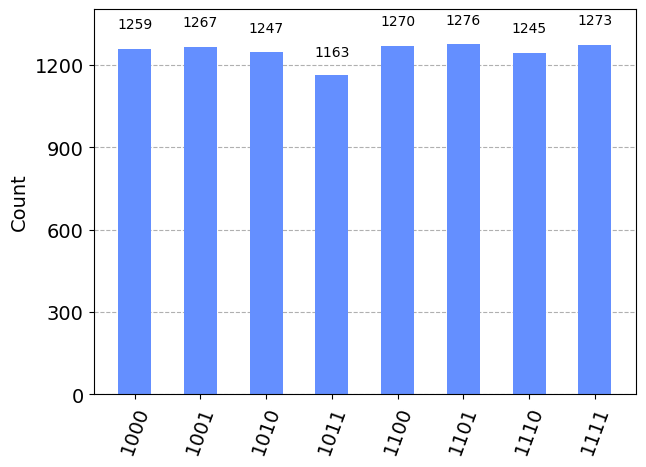

In [7]:
from qiskit.visualization import *
# Define the number of qubits
n = 5

# Call the fidelity check function and print the result
fidelity = ghz_dynamic_fidelity_check(n)
print(f"State Fidelity: {fidelity}")

# Create the GHZ circuit for further analysis
ghz_dynamic_circuit_instance = ghz_dynamic_circuit(n)

# Get the depth of the circuit
circuit_depth = ghz_dynamic_circuit_instance.depth()

# Get the number of qubits in the circuit
num_qubits = ghz_dynamic_circuit_instance.num_qubits

# Calculate the number of gates
gate_count = ghz_dynamic_circuit_instance.count_ops()

print(f"Circuit depth: {circuit_depth}")
print(f"Number of qubits: {num_qubits}")
print(f"Number of gates: {gate_count}")

# Running a simulation
sim_d = AerSimulator()
job_d = sim_d.run(ghz_dynamic_circuit_instance, shots=10000)
result_d = job_d.result()
counts_d = result_d.get_counts()

# Plotting the histogram
plot_histogram(counts_d)

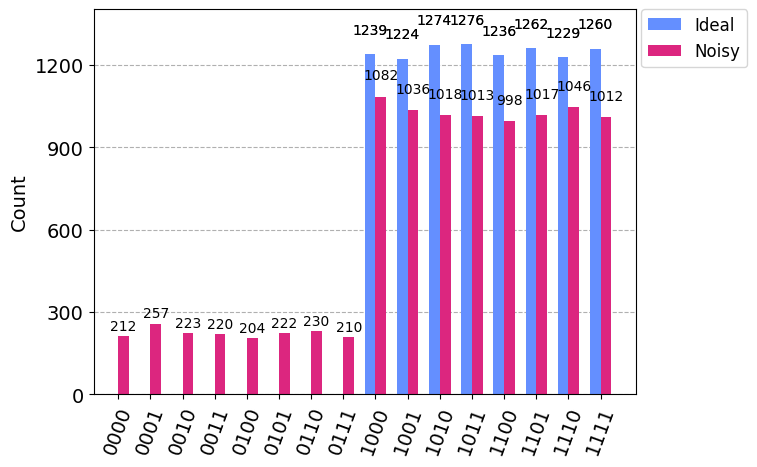

In [8]:
# Run the circuit on the noiseless simulator
job_ideal = aersim.run(ghz_dynamic_circuit_instance, shots=10000)
result_ideal = job_ideal.result()
counts_ideal = result_ideal.get_counts()

# Run the circuit on the noisy simulator
job_noisy = aersim_backend.run(ghz_dynamic_circuit_instance, shots=10000)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts()

# Plotting the histogram to compare both results
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])

In [ ]:
'''
# Perform noisy simulation
result_noise = aersim_backend.run(circuit).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)
'''

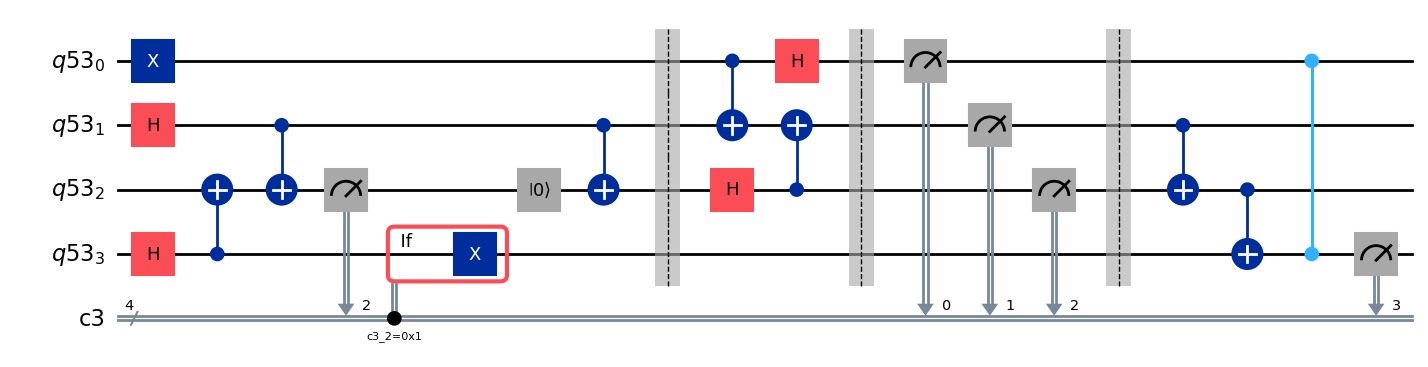

In [9]:
ghz_dynamic_circuit_instance.draw(output='mpl')
